In [12]:
import pandas as pd
from sklearn import preprocessing, decomposition, tree, model_selection, ensemble, linear_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend import classifier as mlxClassifier #For stacking
sns.set_style('whitegrid')

In [13]:
train_data = pd.read_csv('/Users/bharath/Desktop/Folder/Data Science/Projects/prudential-life-insurance-assessment/train.csv')
test_data = pd.read_csv('/Users/bharath/Desktop/Folder/Data Science/Projects/prudential-life-insurance-assessment/test.csv')

total_data = pd.concat([train_data, test_data])
train_data.shape
#print(total_data)
train_data.shape

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


(59381, 128)

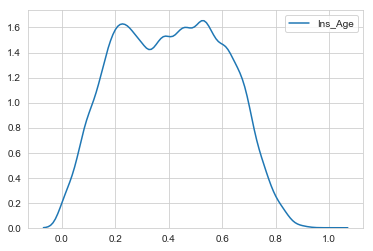

In [14]:
sns.kdeplot(train_data['Ins_Age'])

In [15]:
total_data.shape
train_data.info()
total_data_t = total_data.drop(['Medical_History_1', 'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32'], axis=1)
total_data_t.shape
print(total_data['Product_Info_2'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB
D3    18753
D4    14071
A8     9140
D1     8611
D2     8344
E1     3711
A1     3219
A2     3072
A6     2733
A7     1823
A3     1564
B2     1446
A5     1009
C3      437
C1      377
C4      291
A4      263
C2      197
B1       85
Name: Product_Info_2, dtype: int64


In [16]:
# Check for numeric and chategorical columns
#previous_num_columns = total_data1.select_dtypes(exclude=['object']).columns.values.tolist()
#print(previous_num_columns)

In [17]:
cat_cols = ['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_23', 'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29', 'Medical_History_30', 'Medical_History_31', 'Medical_History_33', 'Medical_History_34', 'Medical_History_35', 'Medical_History_36', 'Medical_History_37', 'Medical_History_38', 'Medical_History_39', 'Medical_History_40', 'Medical_History_41']
total_data1 = pd.get_dummies(total_data_t, columns = cat_cols )

In [18]:
total_data1.head(10)

,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Ht,Id,...,Medical_History_38_3,Medical_History_39_1,Medical_History_39_2,Medical_History_39_3,Medical_History_40_1,Medical_History_40_2,Medical_History_40_3,Medical_History_41_1,Medical_History_41_2,Medical_History_41_3
0,0.323008,0.028,0.0,NaN,NaN,0.598039,NaN,0.526786,0.581818,2,...,0,0,0,1,0,0,1,0,0,1
1,0.272288,0.000,0.0,0.0018,0.188406,NaN,0.084507,NaN,0.600000,5,...,0,0,0,1,0,0,1,1,0,0
2,0.428780,0.030,0.0,0.0300,0.304348,NaN,0.225352,NaN,0.745455,6,...,0,0,0,1,0,0,1,1,0,0
3,0.352438,0.042,0.0,0.2000,0.420290,NaN,0.352113,NaN,0.672727,7,...,0,0,0,1,0,0,1,1,0,0
4,0.424046,0.027,0.0,0.0500,0.463768,NaN,0.408451,NaN,0.654545,8,...,0,0,0,1,0,0,1,1,0,0
5,0.364887,0.325,0.0,1.0000,NaN,0.294118,0.507042,NaN,0.836364,10,...,0,0,0,1,0,0,1,0,0,1
6,0.376587,0.110,NaN,0.8000,0.594203,NaN,0.549296,NaN,0.581818,11,...,0,0,0,1,0,0,1,0,0,1
7,0.571612,0.120,0.0,1.0000,NaN,0.490196,NaN,0.633929,0.781818,14,...,0,0,0,1,0,0,1,1,0,0
8,0.362643,0.165,0.0,1.0000,NaN,0.529412,0.676056,NaN,0.618182,15,...,0,0,0,1,0,0,1,0,0,1
9,0.587796,0.025,0.0,0.0500,0.797101,NaN,NaN,0.553571,0.600000,16,...,0,0,0,1,0,0,1,1,0,0


In [19]:
# Impute the missing continuous columns with mean
Imputer = preprocessing.Imputer(strategy='mean')
Imputer.fit(total_data1[['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']])

total_data1[['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']] = Imputer.transform(total_data1[['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']])

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [20]:
y_impute = total_data1['Response']
x_impute = total_data1.drop('Response',axis=1)
y_train = y_impute[0:train_data.shape[0]]

In [21]:
Scaler = preprocessing.StandardScaler()
Scaler.fit(x_impute[['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']])
x_impute[['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']] = Scaler.transform(x_impute[['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']])


In [22]:
#X_scaled_df = pd.DataFrame(X_scaled, columns = x_impute.columns)
#X_scaled.shape
#total_missing1 = X_scaled_df.isnull().any().sum()
#print(total_missing1)

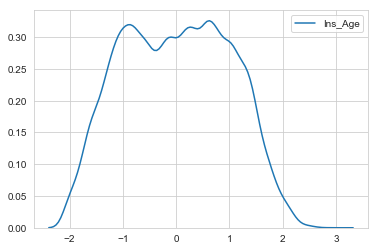

In [23]:
sns.kdeplot(x_impute['Ins_Age'])
#Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5
#sns.kdeplot(test_data['LotArea'], color="r")

In [24]:
#PCA not necessary as Accuracy is more prominent than exececution time
pca = decomposition.PCA(n_components=10)
pca.fit(x_impute)
x_transformed = pca.transform(x_impute)
x_transformed.shape
#X_transformed = X_scaled

(79146, 10)

In [25]:
X_train = x_transformed[0:train_data.shape[0]]
X_train.shape
X_test = x_transformed[train_data.shape[0]:]
X_test.shape
X_train.shape

(59381, 10)

#Separating train and test data
X_train = x_impute[0:train_data.shape[0]]
X_train.shape
X_test = x_impute[train_data.shape[0]:]
X_test.shape
X_train.shape
X_test.shape
#total_data_X = pd.DataFrame(X_train, columns=total_data1.columns)
#total_missing = total_data_tr.isnull().any().sum()
#print(total_missing)

dt = tree.DecisionTreeClassifier()
dt_ada = ensemble.AdaBoostClassifier(dt,random_state=10)
ada_grid = {'n_estimators':[5, 8, 10, 12],'learning_rate':[0.1, 0.5, 0.9]}
param_grid = model_selection.GridSearchCV(dt_ada, ada_grid, cv=10, n_jobs=5)

#dt = tree.DecisionTreeClassifier()
#-------
#dt = ensemble.RandomForestClassifier(n_estimators=5)
#-------
dt = ensemble.RandomForestClassifier(random_state=5)
dt_rand_grid = {'n_estimators':[40],'criterion':['gini','entropy'],'max_depth': [2,4,6],'min_samples_split':[2,5,8] }
param_grid = model_selection.GridSearchCV(dt, dt_rand_grid, cv=5, n_jobs=5)
#----------
#param_grid = model_selection.GridSearchCV(dt, dt_rand_grid, cv=5, n_jobs=5)

In [28]:
rf1 = ensemble.RandomForestClassifier(random_state=2017)

lrSuper = linear_model.LogisticRegression(random_state=2017)

stack_estimator = mlxClassifier.StackingClassifier(classifiers=[rf1], meta_classifier=lrSuper) #, store_train_meta_features=True)
stack_grid = {'randomforestclassifier__n_estimators': [40], 'randomforestclassifier__max_depth': [6], 'randomforestclassifier__min_samples_split':[2],
             'meta_classifier__C': [0.33999999999999997], 'meta_classifier__penalty': ['l1'], 'meta_classifier__tol':[0.03],
             'meta_classifier__max_iter':list(range(10, 101, 20))}

grid_stack_estimator = model_selection.GridSearchCV(stack_estimator, stack_grid, cv=10)
#grid_stack_estimator.fit(X_train1, y_train)

In [29]:
grid_stack_estimator.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the 

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the 

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the 

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=StackingClassifier(average_probas=False,
          classifiers=[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_...ures=False, use_clones=True,
          use_features_in_secondary=False, use_probas=False, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'randomforestclassifier__n_estimators': [40], 'randomforestclassifier__max_depth': [6], 'randomforestclassifier__min_samples_split': [2], 'meta_classifier__C': [0.33999999999999997], 'meta_classifier__penalty': ['l1'], 'meta_classifier__tol': [0.03], 'meta_classifier__max_iter': [10, 30, 50, 70, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
grid_stack_estimator.best_score_

0.40460753439652414

In [34]:
final_model = grid_stack_estimator.best_estimator_
print(final_model)

StackingClassifier(average_probas=False,
          classifiers=[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=2017, verbose=0,
            warm_start=False)],
          drop_last_proba=False,
          meta_classifier=LogisticRegression(C=0.33999999999999997, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=30,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=2017,
          solver='warn', tol=0.03, verbose=0, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=False, verbose=0)


In [35]:
grid_stack_estimator.score(X_train, y_train)

0.4126404068641485

In [37]:
grid_stack_estimator.score(X_train,y_train)

0.4126404068641485

cv_score = model_selection.cross_val_score(final_model, X_train, y_train, cv=15)
print(cv_score.mean())

In [38]:
test_data['Response'] = grid_stack_estimator.predict(X_test)
test_data['Response'] = test_data['Response'].astype('int32')

In [40]:
test_data.to_csv("Prudential_STACK.csv",columns=['Id','Response'],index=False)